## **Basic settings**

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Keras
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Add, ZeroPadding2D, AveragePooling2D, Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Resizing, GlobalAveragePooling2D, Activation
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.initializers import glorot_uniform
import tensorflow as tf
from keras.datasets import cifar10, cifar100
import numpy as np
import os
import matplotlib.pyplot as plt
import skimage
from skimage.util import img_as_ubyte
import cv2

In [15]:
def gen_Lenet(dropout=0.2,dataset='cifar10'):
  if dataset=='cifar10':
    output_num = 10
  elif dataset=='cifar100':
    output_num = 100
  
  model = Sequential()

  # 30 Conv Layer
  model.add(Conv2D(30, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
  # 15 Max Pool Layer
  model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
  model.add(Dropout(dropout))
  # 13 Conv Layer
  model.add(Conv2D(13, kernel_size=(3,3), padding='valid', activation='relu'))
  # 6 Max Pool Layer
  model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
  model.add(Dropout(dropout))
  # Flatten the Layer for transitioning to the Fully Connected Layers
  model.add(Flatten())
  # 120 Fully Connected Layer
  model.add(Dense(120, activation='relu'))
  # 84 Fully Connected Layer
  model.add(Dense(86, activation='relu'))
  # 10 Output
  model.add(Dense(output_num, activation='softmax'))

  return model



In [16]:
def gen_Alexnet(dropout=0.2,dataset='cifar10'):
  if dataset=='cifar10':
    num_classes = 10
  elif dataset=='cifar100':
    num_classes = 100  
  
  model = Sequential()
  model.add(Resizing(224,224))
  model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(224,224,3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(num_classes,activation='softmax'))

  return model

In [17]:
def gen_NiN0(dropout=0.2,dataset='cifar10'):
  if dataset=='cifar10':
    num_classes = 10
  elif dataset=='cifar100':
    num_classes = 100  
  model = Sequential()

  model.add(Conv2D(192, (5, 5), padding='same', input_shape=(32,32,3), activation='relu'))# 32, 32, 3
  model.add(Conv2D(160, (1, 1), padding='same', activation='relu'))
  model.add(Conv2D(96, (1, 1), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
  model.add(Dropout(dropout))
  
  model.add(Conv2D(192, (5, 5), padding='same', activation='relu'))
  model.add(Conv2D(192, (1, 1),padding='same', activation='relu'))
  model.add(Conv2D(192, (1, 1),padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))
  model.add(Dropout(dropout))

  model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(192, (1, 1), padding='same', activation='relu'))
  model.add(Conv2D(num_classes, (1, 1), padding='same', activation='relu'))
  
  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  return model

In [18]:
def gen_NiN(dropout=0.2,dataset='cifar10'):
  if dataset=='cifar10':
    num_classes = 10
  elif dataset=='cifar100':
    num_classes = 100  
  model = Sequential()
  weight_decay  = 0.0001
  model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), 
                    input_shape=(32,32,3)))# 32, 32, 3
  model.add(Activation('relu'))
  model.add(Conv2D(160, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(96, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))

  model.add(Dropout(dropout))
  
  model.add(Conv2D(192, (5, 5), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1),padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(3, 3),strides=(2,2),padding = 'same'))

  model.add(Dropout(dropout))

  model.add(Conv2D(192, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(192, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(Conv2D(10, (1, 1), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))

  model.add(GlobalAveragePooling2D())
  model.add(Activation('softmax'))
  return model

In [19]:
def gen_vgg16(dropout=0.2,dataset='cifar10'):
  # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.
  if dataset=='cifar10':
    num_classes = 10
  elif dataset=='cifar100':
    num_classes = 100  

  model = Sequential()
  weight_decay = 0.0001

  model.add(Conv2D(64, (3, 3), padding='same',
                    input_shape=[32,32,3],kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPool2D(pool_size=(2, 2)))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPool2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPool2D(pool_size=(2, 2)))


  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropout))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(dropout))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=keras.regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(dropout))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model

In [20]:

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

def gen_ResNet50(input_shape=(32, 32, 3),classes=10,dataset='cifar10'):
    if dataset=='cifar10': classes=10
    elif dataset=='cifar100': classes=100
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPool2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 (≈3 lines)
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((1,1), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model    

In [24]:
def train_model(nn='Lenet',dropout=0.2,dataset='cifar10',lr_decay=0.005,initial_lr=0.01,epoch_set=500,batchsize=128,optimizer_selected='sgd',loss_selected='categorical_crossentropy',save_period=10, save_dir='/content/drive/MyDrive/ECE6930/Combine-test-0308/default' ):
  if dataset=='cifar10':
    (input_train, output_train), (input_test, output_test) = cifar10.load_data()
  elif dataset=='cifar100':
    (input_train, output_train), (input_test, output_test) = cifar100.load_data()
    
  print(len(input_train),len(input_test))
  if nn=='Lenet': model = gen_Lenet(dropout,dataset); print('Lenet')
  elif nn=='AlexNet': model = gen_Alexnet(dropout,dataset); print('AlexNet')
  elif nn=='NiN': model = gen_NiN(dropout,dataset); print('NiN')
  elif nn=='vgg16': model = gen_vgg16(dropout,dataset); print('vgg16')
  elif nn=='ResNet50': model = gen_ResNet50(dataset = dataset); print('ResNet50')
  
  initial_learning_rate = initial_lr

  def scheduler(epoch, lr):
    return lr*np.exp(-lr_decay)
  callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

  model.compile(optimizer=optimizer_selected, loss=loss_selected, metrics=['accuracy'])
  #save_dir = '/content/drive/MyDrive/ECE6930/Combine-test-0308/03'
  checkpointer = keras.callbacks.ModelCheckpoint(os.path.join(save_dir, '{epoch:03d}.h5'), monitor='val_loss', verbose=0,	
                           save_best_only=False, save_weights_only=False, mode='auto', period=save_period)
  # train the model
  history = model.fit(input_train/255, to_categorical(output_train), epochs=epoch_set, 
            validation_data=(input_test/255, to_categorical(output_test)),
                      batch_size=batchsize,callbacks=[callback,checkpointer])
  # test
  score = model.evaluate(input_test/255, to_categorical(output_test), batch_size=batchsize)

  # print test set results
  print("Testset Loss: %f" % score[0])
  print("Testset Accuracy: %f" % score[1])

  return history,score

## **Printing Confusion Matrix**

In [28]:
import os
filePath = '/content/drive/MyDrive/ECE6930/Combine-test-0308/04/Lenet-cifar10'
file_dict = os.listdir(filePath)
file_dict

['010.h5',
 '020.h5',
 '030.h5',
 '040.h5',
 '050.h5',
 '060.h5',
 '070.h5',
 '080.h5',
 '090.h5',
 '100.h5']

In [31]:
import keras
#from tensorflow import keras
from keras import optimizers
import numpy as np
from keras.datasets import cifar10
import tensorflow as tf
import sys
import numpy
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print_log = open("/content/drive/MyDrive/ECE6930/Combine-test-0308/04/Lenet-cifar10-plog.txt", 'w')
initial_learning_rate = 0.001
sgd = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)
for i in file_dict[-5:]:
  model_Lenet = keras.models.load_model('/content/drive/MyDrive/ECE6930/Combine-test-0308/04/Lenet-cifar10/'+i,compile=False)
  model_Lenet.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  numpy.set_printoptions(threshold=sys.maxsize)
  predictions = model_Lenet.predict(x_test)
  predictions = np.argmax(predictions,axis=1)

  conf_matrix = tf.math.confusion_matrix(labels=y_test,predictions=predictions)
  print(conf_matrix, file=print_log)
  print(i, file=print_log)
print_log.close()  

313/313 [==============================] - 1s 2ms/step


## **Training and printing results**

### Lenet

In [25]:
history,score = train_model(nn='Lenet',dataset='cifar10',epoch_set=100,batchsize=512,initial_lr=0.1,lr_decay=0.005, save_dir='/content/drive/MyDrive/ECE6930/Combine-test-0308/04/Lenet-cifar10')

50000 10000
Lenet
Epoch 1/100
98/98 [==============================] - 5s 21ms/step - loss: 2.3045 - accuracy: 0.1079 - val_loss: 2.2988 - val_accuracy: 0.1177 - lr: 0.0100
Epoch 2/100
98/98 [==============================] - 1s 15ms/step - loss: 2.2986 - accuracy: 0.1130 - val_loss: 2.2944 - val_accuracy: 0.1312 - lr: 0.0099
Epoch 3/100
98/98 [==============================] - 1s 15ms/step - loss: 2.2929 - accuracy: 0.1233 - val_loss: 2.2883 - val_accuracy: 0.1433 - lr: 0.0099
Epoch 4/100
98/98 [==============================] - 1s 15ms/step - loss: 2.2852 - accuracy: 0.1311 - val_loss: 2.2783 - val_accuracy: 0.1599 - lr: 0.0098
Epoch 5/100
98/98 [==============================] - 1s 15ms/step - loss: 2.2734 - accuracy: 0.1471 - val_loss: 2.2625 - val_accuracy: 0.1833 - lr: 0.0098
Epoch 6/100
98/98 [==============================] - 2s 16ms/step - loss: 2.2547 - accuracy: 0.1639 - val_loss: 2.2367 - val_accuracy: 0.2155 - lr: 0.0097
Epoch 7/100
98/98 [==============================] -

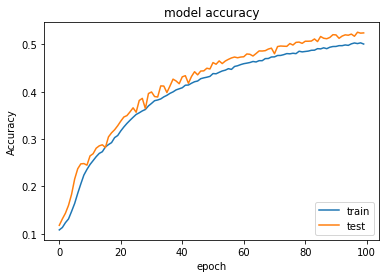

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


### Alexnet

In [33]:
history,score = train_model(nn='AlexNet',dataset='cifar10',epoch_set=100,batchsize=512,initial_lr=0.1,lr_decay=0.01,dropout=0.3, save_dir='/content/drive/MyDrive/ECE6930/Combine-test-0308/04/AlexNet-cifar10')

50000 10000
AlexNet
Epoch 1/100
98/98 [==============================] - 60s 521ms/step - loss: 2.2994 - accuracy: 0.1166 - val_loss: 2.2938 - val_accuracy: 0.1230 - lr: 0.0099
Epoch 2/100
98/98 [==============================] - 41s 422ms/step - loss: 2.2874 - accuracy: 0.1295 - val_loss: 2.2721 - val_accuracy: 0.1266 - lr: 0.0098
Epoch 3/100
98/98 [==============================] - 42s 426ms/step - loss: 2.2455 - accuracy: 0.1630 - val_loss: 2.1713 - val_accuracy: 0.2295 - lr: 0.0097
Epoch 4/100
98/98 [==============================] - 41s 423ms/step - loss: 2.1307 - accuracy: 0.2200 - val_loss: 2.0598 - val_accuracy: 0.2581 - lr: 0.0096
Epoch 5/100
98/98 [==============================] - 41s 424ms/step - loss: 2.0513 - accuracy: 0.2537 - val_loss: 1.9905 - val_accuracy: 0.2813 - lr: 0.0095
Epoch 6/100
98/98 [==============================] - 42s 424ms/step - loss: 1.9925 - accuracy: 0.2789 - val_loss: 1.9151 - val_accuracy: 0.3110 - lr: 0.0094
Epoch 7/100
98/98 [===================

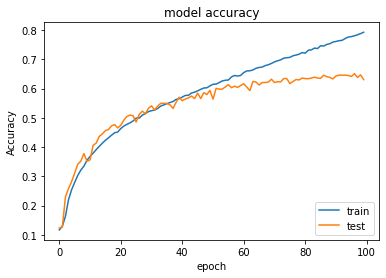

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


### NiN

In [ ]:
history,score = train_model(nn='NiN',dataset='cifar10',epoch_set=100,batchsize=128,initial_lr=0.1,lr_decay=0.005)

50000 10000
NiN


Epoch 1/100
391/391 [==============================] - 34s 58ms/step - loss: 2.4238 - accuracy: 0.1066 - val_loss: 2.4233 - val_accuracy: 0.1039 - lr: 0.0100
Epoch 2/100
391/391 [==============================] - 21s 54ms/step - loss: 2.4231 - accuracy: 0.1168 - val_loss: 2.4227 - val_accuracy: 0.1047 - lr: 0.0099
Epoch 3/100
391/391 [==============================] - 20s 52ms/step - loss: 2.4224 - accuracy: 0.1137 - val_loss: 2.4218 - val_accuracy: 0.1404 - lr: 0.0099
Epoch 4/100
391/391 [==============================] - 20s 52ms/step - loss: 2.4210 - accuracy: 0.1251 - val_loss: 2.4198 - val_accuracy: 0.1325 - lr: 0.0098
Epoch 5/100
391/391 [==============================] - 21s 54ms/step - loss: 2.4172 - accuracy: 0.1415 - val_loss: 2.4128 - val_accuracy: 0.1606 - lr: 0.0098
Epoch 6/100
391/391 [==============================] - 21s 53ms/step - loss: 2.4042 - accuracy: 0.1669 - val_loss: 2.3916 - val_accuracy: 0.1766 - lr: 0.0097
Epoch 7/100
391/391 [==============================]

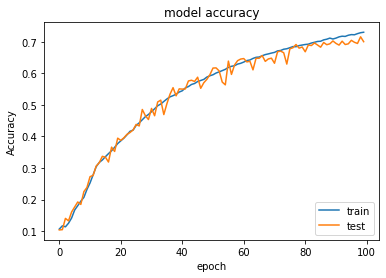

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


In [ ]:
history,score = train_model(nn='NiN',dataset='cifar10',epoch_set=200,batchsize=128,initial_lr=0.1,lr_decay=0.005)

50000 10000
NiN
Epoch 1/200
391/391 [==============================] - 25s 58ms/step - loss: 2.4233 - accuracy: 0.1030 - val_loss: 2.4225 - val_accuracy: 0.1161 - lr: 0.0100
Epoch 2/200
391/391 [==============================] - 21s 54ms/step - loss: 2.4214 - accuracy: 0.1187 - val_loss: 2.4191 - val_accuracy: 0.1622 - lr: 0.0099
Epoch 3/200
391/391 [==============================] - 21s 53ms/step - loss: 2.4141 - accuracy: 0.1411 - val_loss: 2.4038 - val_accuracy: 0.1633 - lr: 0.0099
Epoch 4/200
391/391 [==============================] - 21s 53ms/step - loss: 2.3775 - accuracy: 0.1570 - val_loss: 2.3446 - val_accuracy: 0.1713 - lr: 0.0098
Epoch 5/200
391/391 [==============================] - 21s 53ms/step - loss: 2.3348 - accuracy: 0.1763 - val_loss: 2.3267 - val_accuracy: 0.1823 - lr: 0.0098
Epoch 6/200
391/391 [==============================] - 21s 53ms/step - loss: 2.3238 - accuracy: 0.1846 - val_loss: 2.3275 - val_accuracy: 0.1885 - lr: 0.0097
Epoch 7/200
391/391 [===============

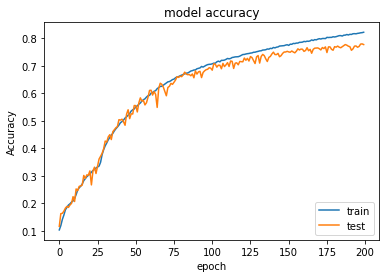

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


In [ ]:
history,score = train_model(nn='NiN',dataset='cifar10',epoch_set=400,batchsize=128,initial_lr=0.1,lr_decay=0.005)

170498071/170498071 [==============================] - 14s 0us/step
50000 10000


NiN
Epoch 1/400
391/391 [==============================] - 32s 53ms/step - loss: 2.4231 - accuracy: 0.1132 - val_loss: 2.4219 - val_accuracy: 0.1500 - lr: 0.0100
Epoch 2/400
391/391 [==============================] - 20s 52ms/step - loss: 2.4185 - accuracy: 0.1556 - val_loss: 2.4120 - val_accuracy: 0.1739 - lr: 0.0099
Epoch 3/400
391/391 [==============================] - 21s 53ms/step - loss: 2.3918 - accuracy: 0.1658 - val_loss: 2.3473 - val_accuracy: 0.1718 - lr: 0.0099
Epoch 4/400
391/391 [==============================] - 21s 53ms/step - loss: 2.2824 - accuracy: 0.1873 - val_loss: 2.2276 - val_accuracy: 0.2111 - lr: 0.0098
Epoch 5/400
391/391 [==============================] - 22s 56ms/step - loss: 2.2006 - accuracy: 0.2189 - val_loss: 2.1505 - val_accuracy: 0.2268 - lr: 0.0098
Epoch 6/400
391/391 [==============================] - 20s 52ms/step - loss: 2.1557 - accuracy: 0.2342 - val_loss: 2.1540 - val_accuracy: 0.2337 - lr: 0.0097
Epoch 7/400
391/391 [===========================

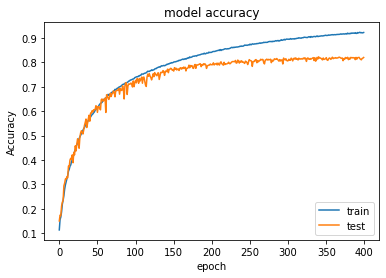

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


### vgg16

In [ ]:
history,score = train_model(nn='vgg16',dataset='cifar10',epoch_set=100,batchsize=128,initial_lr=0.1,lr_decay=0.005)

50000 10000


vgg16
Epoch 1/100
391/391 [==============================] - 38s 86ms/step - loss: 2.5695 - accuracy: 0.2852 - val_loss: 3.1241 - val_accuracy: 0.1962 - lr: 0.0100
Epoch 2/100
391/391 [==============================] - 31s 80ms/step - loss: 2.0752 - accuracy: 0.4109 - val_loss: 2.2573 - val_accuracy: 0.3895 - lr: 0.0099
Epoch 3/100
391/391 [==============================] - 31s 79ms/step - loss: 1.8744 - accuracy: 0.4858 - val_loss: 1.9576 - val_accuracy: 0.4842 - lr: 0.0099
Epoch 4/100
391/391 [==============================] - 32s 82ms/step - loss: 1.7206 - accuracy: 0.5424 - val_loss: 2.0649 - val_accuracy: 0.4565 - lr: 0.0098
Epoch 5/100
391/391 [==============================] - 31s 79ms/step - loss: 1.5927 - accuracy: 0.5888 - val_loss: 1.6581 - val_accuracy: 0.5806 - lr: 0.0098
Epoch 6/100
391/391 [==============================] - 32s 82ms/step - loss: 1.4871 - accuracy: 0.6268 - val_loss: 1.5176 - val_accuracy: 0.6418 - lr: 0.0097
Epoch 7/100
391/391 [=========================

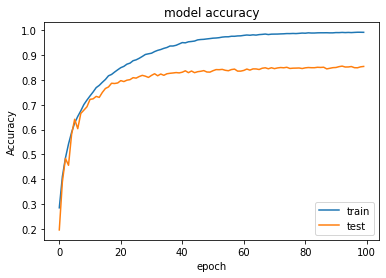

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [ ]:
history,score = train_model(nn='vgg16',dataset='cifar10',epoch_set=200,batchsize=128,initial_lr=0.1,lr_decay=0.005)

50000 10000


vgg16
Epoch 1/200
391/391 [==============================] - 38s 85ms/step - loss: 2.5332 - accuracy: 0.2940 - val_loss: 3.0652 - val_accuracy: 0.1535 - lr: 0.0100
Epoch 2/200
391/391 [==============================] - 31s 79ms/step - loss: 2.0281 - accuracy: 0.4293 - val_loss: 1.9918 - val_accuracy: 0.4525 - lr: 0.0099
Epoch 3/200
391/391 [==============================] - 31s 78ms/step - loss: 1.8138 - accuracy: 0.5038 - val_loss: 1.7593 - val_accuracy: 0.5364 - lr: 0.0099
Epoch 4/200
391/391 [==============================] - 32s 82ms/step - loss: 1.6569 - accuracy: 0.5623 - val_loss: 1.8149 - val_accuracy: 0.5394 - lr: 0.0098
Epoch 5/200
391/391 [==============================] - 32s 81ms/step - loss: 1.5327 - accuracy: 0.6103 - val_loss: 1.6486 - val_accuracy: 0.5968 - lr: 0.0098
Epoch 6/200
391/391 [==============================] - 31s 78ms/step - loss: 1.4459 - accuracy: 0.6424 - val_loss: 1.5050 - val_accuracy: 0.6358 - lr: 0.0097
Epoch 7/200
391/391 [=========================

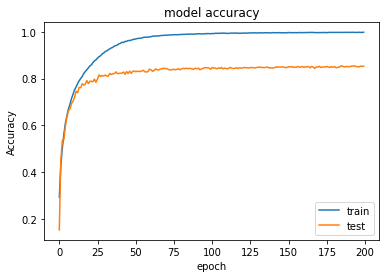

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

In [ ]:
history,score = train_model(nn='vgg16',dataset='cifar10',epoch_set=200,batchsize=128,initial_lr=0.1,lr_decay=0.005,dropout=0.3)

50000 10000


vgg16
Epoch 1/200
391/391 [==============================] - 37s 85ms/step - loss: 2.8025 - accuracy: 0.2298 - val_loss: 2.7865 - val_accuracy: 0.1664 - lr: 0.0100
Epoch 2/200
391/391 [==============================] - 32s 82ms/step - loss: 2.2599 - accuracy: 0.3475 - val_loss: 2.5748 - val_accuracy: 0.2707 - lr: 0.0099
Epoch 3/200
391/391 [==============================] - 31s 79ms/step - loss: 2.0305 - accuracy: 0.4213 - val_loss: 2.2444 - val_accuracy: 0.3999 - lr: 0.0099
Epoch 4/200
391/391 [==============================] - 31s 80ms/step - loss: 1.8877 - accuracy: 0.4739 - val_loss: 2.1107 - val_accuracy: 0.4480 - lr: 0.0098
Epoch 5/200
391/391 [==============================] - 32s 82ms/step - loss: 1.7846 - accuracy: 0.5133 - val_loss: 2.0990 - val_accuracy: 0.4837 - lr: 0.0098
Epoch 6/200
391/391 [==============================] - 31s 79ms/step - loss: 1.6810 - accuracy: 0.5529 - val_loss: 2.4189 - val_accuracy: 0.4219 - lr: 0.0097
Epoch 7/200
391/391 [=========================

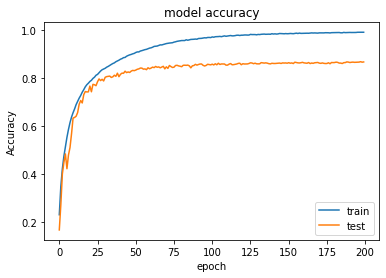

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

### ResNet50

In [ ]:
history,score = train_model(nn='ResNet50',dataset='cifar10',epoch_set=100,batchsize=128,initial_lr=0.1,lr_decay=0.01,dropout=0.3)

50000 10000


ResNet50
Epoch 1/100
391/391 [==============================] - 38s 66ms/step - loss: 2.4286 - accuracy: 0.3062 - val_loss: 1.8573 - val_accuracy: 0.3017 - lr: 0.0099
Epoch 2/100
391/391 [==============================] - 24s 63ms/step - loss: 1.7860 - accuracy: 0.4406 - val_loss: 1.8362 - val_accuracy: 0.4484 - lr: 0.0098
Epoch 3/100
391/391 [==============================] - 24s 62ms/step - loss: 1.5311 - accuracy: 0.4995 - val_loss: 2.4653 - val_accuracy: 0.4721 - lr: 0.0097
Epoch 4/100
391/391 [==============================] - 24s 61ms/step - loss: 1.3595 - accuracy: 0.5445 - val_loss: 1.3974 - val_accuracy: 0.5195 - lr: 0.0096
Epoch 5/100
391/391 [==============================] - 24s 62ms/step - loss: 1.2679 - accuracy: 0.5764 - val_loss: 1.5235 - val_accuracy: 0.4850 - lr: 0.0095
Epoch 6/100
391/391 [==============================] - 24s 62ms/step - loss: 1.1465 - accuracy: 0.6147 - val_loss: 1.4170 - val_accuracy: 0.5272 - lr: 0.0094
Epoch 7/100
391/391 [======================

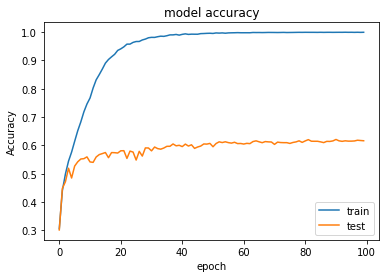

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()

50000 10000


ResNet50
Epoch 1/100
391/391 [==============================] - 38s 67ms/step - loss: 4.7363 - accuracy: 0.0676 - val_loss: 4.1157 - val_accuracy: 0.0713 - lr: 0.0099
Epoch 2/100
391/391 [==============================] - 24s 62ms/step - loss: 3.9397 - accuracy: 0.1344 - val_loss: 3.7036 - val_accuracy: 0.1401 - lr: 0.0098
Epoch 3/100
391/391 [==============================] - 24s 62ms/step - loss: 3.6004 - accuracy: 0.1778 - val_loss: 4.2404 - val_accuracy: 0.1620 - lr: 0.0097
Epoch 4/100
391/391 [==============================] - 24s 62ms/step - loss: 3.3384 - accuracy: 0.2162 - val_loss: 3.7565 - val_accuracy: 0.1863 - lr: 0.0096
Epoch 5/100
391/391 [==============================] - 24s 62ms/step - loss: 3.1384 - accuracy: 0.2492 - val_loss: 3.4389 - val_accuracy: 0.2018 - lr: 0.0095
Epoch 6/100
391/391 [==============================] - 24s 62ms/step - loss: 2.9344 - accuracy: 0.2831 - val_loss: 3.3877 - val_accuracy: 0.2095 - lr: 0.0094
Epoch 7/100
391/391 [======================

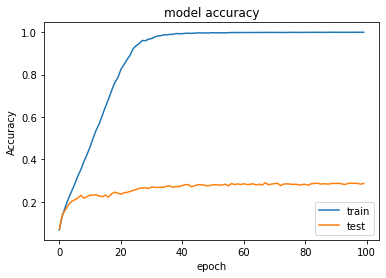

In [ ]:
history,score = train_model(nn='ResNet50',dataset='cifar100',epoch_set=100,batchsize=128,initial_lr=0.1,lr_decay=0.01,dropout=0.3)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()